## 一、特征缩放

In [35]:
# pandas: Python Data Analysis Library 提供大量能快速便捷地处理数据的函数和方法
import pandas as pd

# seaborn: statistical data visualization 高层数据可视化库
import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="dark")

# Matplotlib：2D Python 绘图包
import matplotlib.pyplot as plt

# Tensorflow：端到端开源机器学习平台
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Numpy：一个运行速度非常快的数学库，主要用于大量的维度数组与矩阵运算
import numpy as np

In [36]:
# 特征缩放
def normalize_feature(df):
    # 对原始数据每一列应用一个 lambda 函数，mean() 求每列平均值，std() 求标准差
    return df.apply(lambda column: (column - column.mean()) / column.std())

In [37]:
# 显示原始数据
raw_data = pd.read_csv('ex1data2.txt', names = ['square', 'bedrooms', 'price'])
raw_data.head()

,square,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [38]:
# 对原始数据进行特征缩放
data = normalize_feature(raw_data)
data.head()

,square,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


## 二、读取多维特征

In [39]:
# 读取数据特征
def get_X(df):
    # 创建 m 行 1 列的数据帧
    ones = pd.DataFrame({'ones': np.ones(len(df))})
    # 合并全 1 向量作为元素数据第一列，axis = 0 按行合并，anix = 1 按列合并
    data = pd.concat([ones, df], axis=1)
    # ???
    return data.iloc[:, :-1].iloc[:, :].values

In [40]:
# 读取数据值，即数据标签
def get_y(df):
    # 返回原始数据最后一列组成的数组，df.iloc[:, -1] 指最后一列
    return np.array(df.iloc[:, -1])

In [43]:
# 输出特征数据维度和类型
X = get_X(data)
print(X.shape, type(X))
print(X)

(47, 3) <class 'numpy.ndarray'>
[[ 1.00000000e+00  1.30009869e-01 -2.23675187e-01]
 [ 1.00000000e+00 -5.04189838e-01 -2.23675187e-01]
 [ 1.00000000e+00  5.02476364e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.35723065e-01 -1.53776691e+00]
 [ 1.00000000e+00  1.25747602e+00  1.09041654e+00]
 [ 1.00000000e+00 -1.97317285e-02  1.09041654e+00]
 [ 1.00000000e+00 -5.87239800e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.21881404e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.81023044e-01 -2.23675187e-01]
 [ 1.00000000e+00 -6.37573110e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.63567023e-02  1.09041654e+00]
 [ 1.00000000e+00 -8.56737193e-04 -2.23675187e-01]
 [ 1.00000000e+00 -1.39273340e-01 -2.23675187e-01]
 [ 1.00000000e+00  3.11729182e+00  2.40450826e+00]
 [ 1.00000000e+00 -9.21956312e-01 -2.23675187e-01]
 [ 1.00000000e+00  3.76643089e-01  1.09041654e+00]
 [ 1.00000000e+00 -8.56523009e-01 -1.53776691e+00]
 [ 1.00000000e+00 -9.62222960e-01 -2.23675187e-01]
 [ 1.00000000e+00  7.65467909e-01  1.09041654e+00]

## 三、多变量梯度下降

In [44]:
# 输出标签数据维度和类型
y = get_y(data)
print(y.shape, type(y))

(47,) <class 'numpy.ndarray'>


In [45]:
# 计算偏导数
def gradient(theta, X, y):
    m = X.shape[0]
    
    # 为什么顺序反过来了???
    inner = X.T @ (X @ theta - y)
    
    return inner / m

In [46]:
# Cost Function
# X: R(m * n) 特征矩阵
# y: R(m * 1) 标签值矩阵
# theta: R(n) 线性回归参数
def lr_cost(theta, X, y):
    # m 为样本数
    m = X.shape[0]
    
    # 误差 = theta * x - y
    inner = X @ theta - y
    
    # 将平方计算转换为：行向量 * 列向量
    square_sum = inner.T @ inner
    
    # 缩小成本量大小
    cost = square_sum / (2 * m)
    
    return cost;

In [47]:
# 批量梯度下降
# epoch: 下降迭代次数
# alpha: 初始学习率
def batch_gradient_decent(theta, X, y, epoch, alpha = 0.01):
    # 计算初始成本：theta 都为 0
    cost_data = [lr_cost(theta, X, y)]
    
    # 创建新的 theta 变量，不与原来的混淆
    _theta = theta.copy()
    
    for _ in range(epoch):
        _theta = _theta - alpha * gradient(_theta, X, y)
        cost_data.append(lr_cost(_theta, X, y))
        
    return _theta, cost_data

In [48]:
# 初始化 theta 参数均为 0
theta = np.zeros(X.shape[1])

# 设置迭代次数
epoch = 500

# 设置学习率
alpha = 0.01

In [49]:
# 多变量批量梯度下降
final_theta, cost_data = batch_gradient_decent(theta, X, y, epoch, alpha = alpha)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


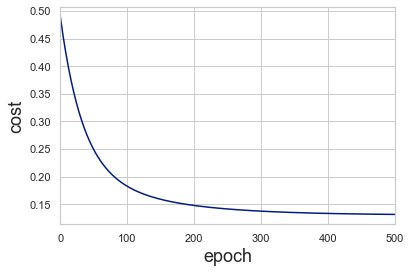

In [50]:
# 代价 - 迭代次数可视化
sns.tsplot(time = np.arange(len(cost_data)), data = cost_data)
plt.xlabel('epoch', fontsize = 18)
plt.ylabel('cost', fontsize = 18)
plt.show()

In [51]:
# 输出迭代的最优参数 theta
final_theta

array([-1.16537985e-16,  8.30383883e-01,  8.23982853e-04])